# 1. Supervised Learning Model Evaluation

### Libraries, Packages and Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #split training and testing data
from sklearn.linear_model import LogisticRegression #machine learning

In [2]:
df = pd.read_csv("stroke.csv")

#### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1136 non-null   int64  
 1   age                1136 non-null   int64  
 2   hypertension       1136 non-null   int64  
 3   heart_disease      1136 non-null   int64  
 4   ever_married       1136 non-null   int64  
 5   work_type          1136 non-null   int64  
 6   Residence_type     1136 non-null   int64  
 7   avg_glucose_level  1136 non-null   float64
 8   bmi                1084 non-null   float64
 9   smoking_status     1136 non-null   int64  
 10  stroke             1136 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 97.8 KB


In [4]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2,31,0,0,2,4,1,70.66,27.2,4,0
1,2,13,0,0,2,1,1,85.81,18.6,2,0
2,1,18,0,0,2,2,2,60.56,33.0,4,0
3,2,65,0,0,1,2,2,205.77,46.0,3,1
4,1,4,0,0,2,1,1,90.42,16.2,2,0


In [5]:
# Get the number of unique values in each column
unique_counts = df.nunique()

print("Number of unique values in each column:")
print(unique_counts)

Number of unique values in each column:
gender                  3
age                    83
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    1068
bmi                   308
smoking_status          4
stroke                  2
dtype: int64


In [6]:
df.stroke.unique()

array([0, 1], dtype=int64)

### Data Cleaning

Option 1: Mean Imputation

In [7]:
# Replace the missing values with the mean value of the bmi column.
# df['bmi'].fillna(df['bmi'].mean(), inplace=True)

Option 2: Advanced Imputation

In [8]:
# k-Nearest Neighbors to predict the missing value

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[['bmi']] = imputer.fit_transform(df[['bmi']])

Opted for KNN Imputation over simple mean imputation for handling missing BMI values. KNN Imputer captures the underlying data distribution and feature similarity more effectively, thereby providing a more nuanced approach to replacing missing data points.

### Split the Data

In [9]:
X = df.drop(['stroke'], axis=1)
y = df.stroke.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Fit and Eval the Model

In [10]:
accuracies = {}

In [11]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

acc = lr.score(X_test, y_test)*100
accuracies['Logistic Regression'] = acc

print("Test Accuracy {}".format(acc))

Test Accuracy 87.68328445747801


In [12]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)*100

accuracies['Decision Tree Classifier'] = acc
print("Test Accuracy {}".format(acc))

Test Accuracy 83.57771260997067


In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

acc = rfc.score(X_test, y_test)*100
accuracies['Random Forest Classifier'] = acc

print("Test Accuracy {}".format(acc))

Test Accuracy 87.09677419354838


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

acc = knn.score(X_test, y_test)*100
accuracies['KNeighbors Classifier'] = acc

print("Test Accuracy {}".format(acc))

Test Accuracy 85.63049853372434


In [15]:
# Conclusion
for model, accuracy in accuracies.items():
    print(f"{model}: {accuracy:.2f}%") #f-string

Logistic Regression: 87.68%
Decision Tree Classifier: 83.58%
Random Forest Classifier: 87.10%
KNeighbors Classifier: 85.63%


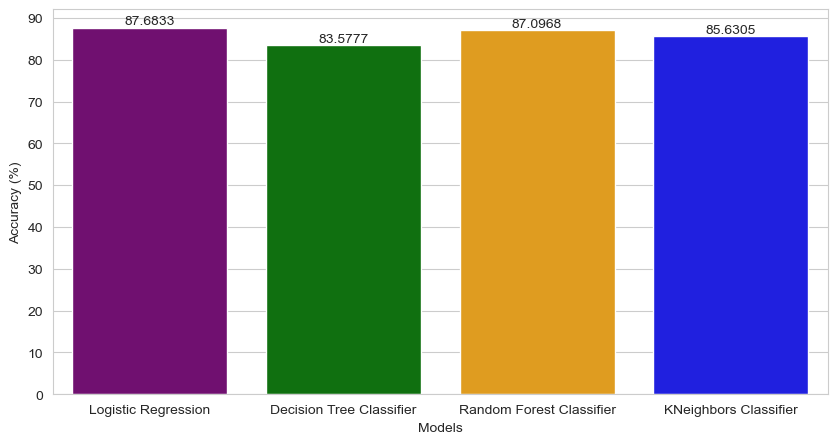

In [16]:
colors = ["purple", "green", "orange", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
plt.yticks(np.arange(0, 100, 10))
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")

ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)

for container in ax.containers:
    ax.bar_label(container)

plt.show()

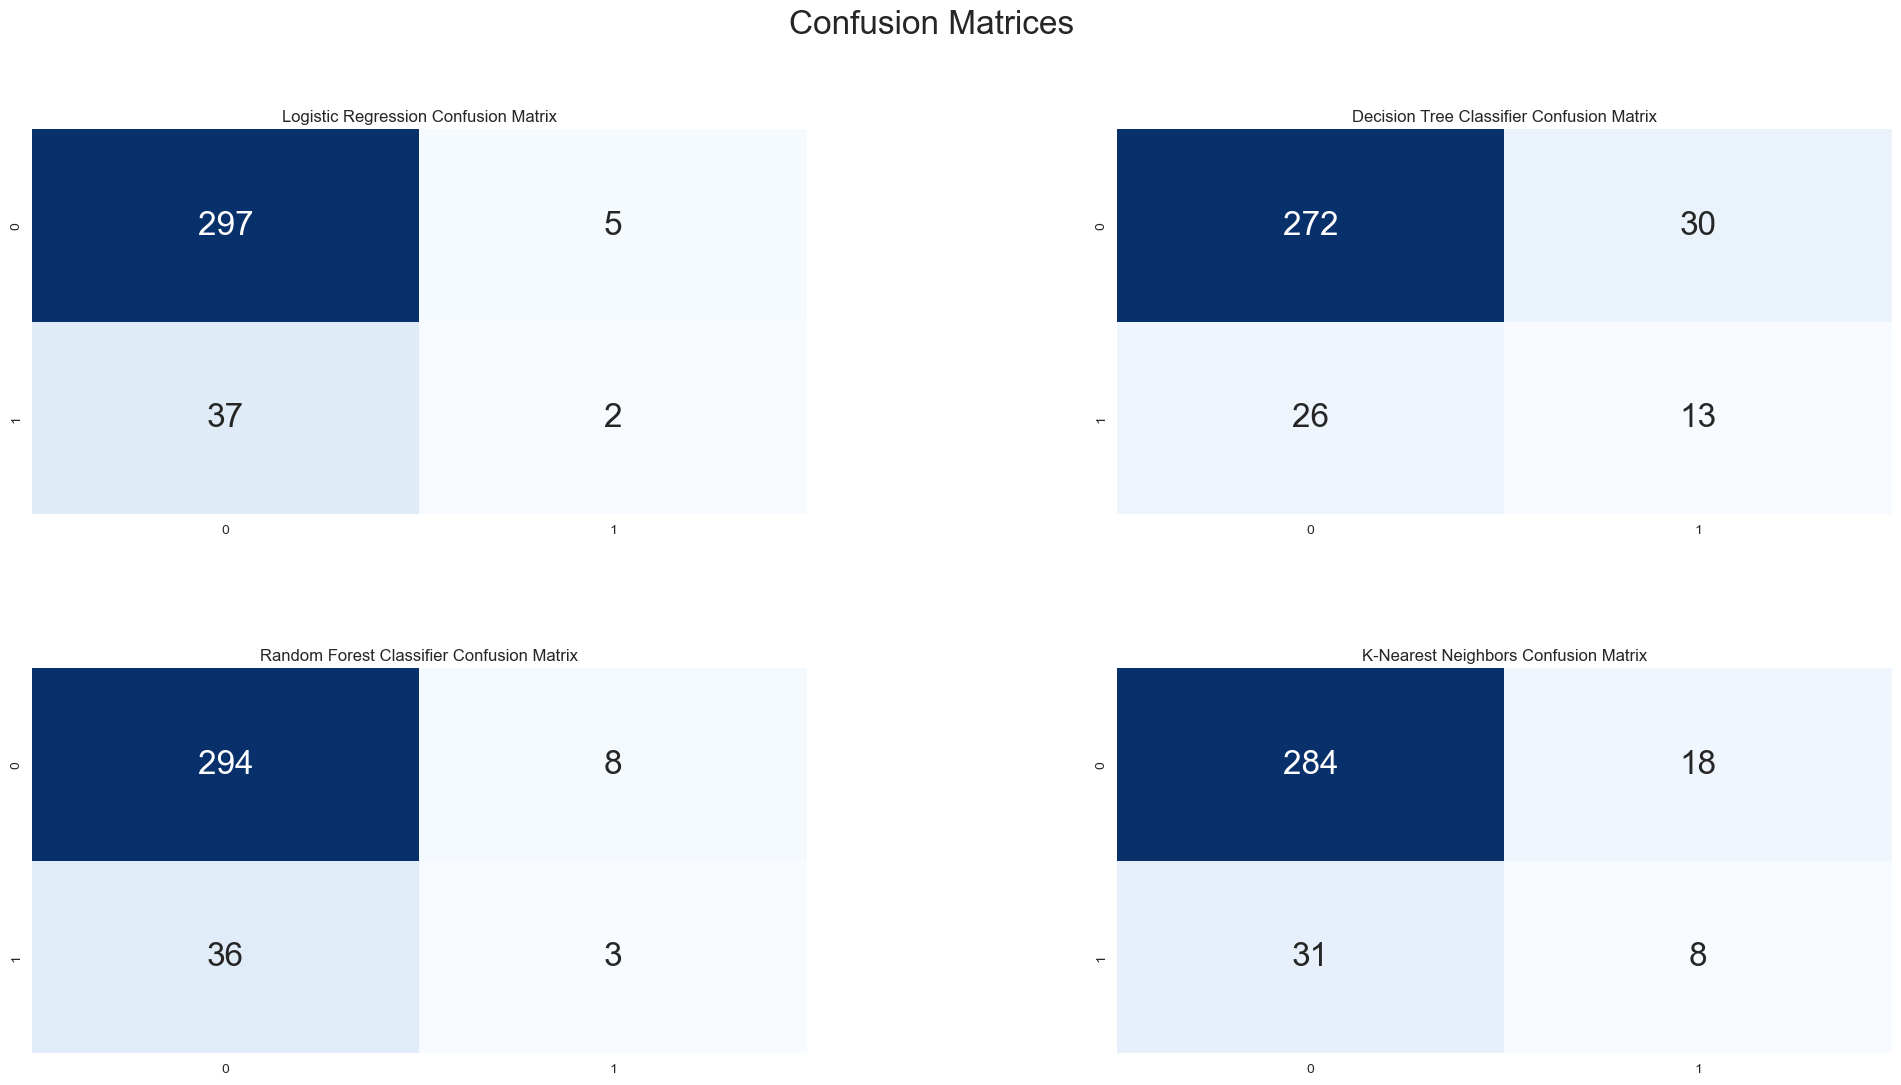

In [17]:
from sklearn.metrics import confusion_matrix

y_head_lr = lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_head_lr)

y_head_dtc = dtc.predict(X_test)
cm_dtc = confusion_matrix(y_test, y_head_dtc)

y_head_rfc = rfc.predict(X_test)
cm_rfc = confusion_matrix(y_test, y_head_rfc)

y_head_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_head_knn)

plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(2, 2, 1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

plt.subplot(2, 2, 2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

plt.subplot(2, 2, 3)
plt.title("Random Forest Classifier Confusion Matrix")
sns.heatmap(cm_rfc, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

plt.subplot(2, 2, 4)
plt.title("K-Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

plt.show()

# 2. Feature Importance

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.inspection import permutation_importance

In [19]:
X = df.drop(['stroke'], axis=1)
y = df.stroke.values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


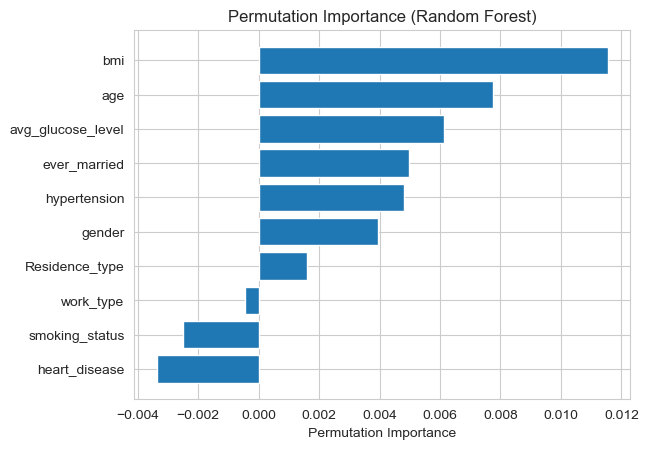

In [22]:
perm_importance = permutation_importance(rf_classifier, X_test, y_test, n_repeats=30, random_state=42)

# Get feature names
feature_names = X_test.columns

# Calculate mean importance and sort features
mean_importance = perm_importance.importances_mean
sorted_idx = mean_importance.argsort()

# Plot permutation importance
plt.barh(range(len(sorted_idx)), mean_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance (Random Forest)')
plt.show()

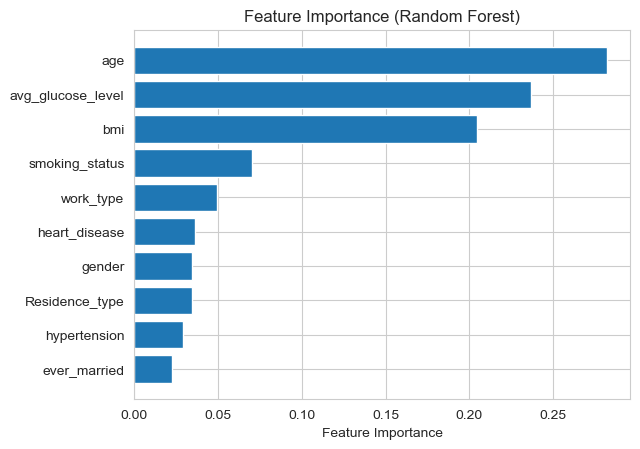

In [23]:
# Get feature importances from RandomForest
rf_feature_importances = rf_classifier.feature_importances_

# Sort features by importance
sorted_idx_rf = rf_feature_importances.argsort()

# Plot feature importances from RandomForest
plt.barh(range(len(sorted_idx_rf)), rf_feature_importances[sorted_idx_rf], align='center')
plt.yticks(range(len(sorted_idx_rf)), [feature_names[i] for i in sorted_idx_rf])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

# 3. Modelling (Determine Accuracy)

In [24]:
conda install -c anaconda graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [26]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz #Decision tree
import pydotplus

In [27]:
important_features = ['age', 'avg_glucose_level', 'bmi', 'work_type']
f = df[important_features]  # input
t = df['stroke']  # target

In [28]:
# Create and fit the decision tree
clf_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf_dt.fit(f, t)

# Export resulting tree to DOT source code string
dot_data = export_graphviz(clf_dt,
                                feature_names=important_features,
                                out_file=None,
                                filled=True,
                                rounded=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('tree.png')

True

# 4. Unsupervised Learning (Clustering)

Why Drop 'Stroke'?
Been instructed to drop the 'stroke' column for this task. The reason is likely because the column represents the target variable, and K-means clustering is an unsupervised learning method. In unsupervised learning, we aim to identify inherent structures in the data without using explicitly-provided labels. Therefore, the 'stroke' column, which is a label, would not be appropriate to include in the clustering.

### Data Preprocessing

In [29]:
from sklearn.preprocessing import StandardScaler

# Drop the 'stroke' column
df_cluster = df.drop('stroke', axis=1)

# Handle missing values in 'bmi' by replacing them with the median
df_cluster['bmi'].fillna(df_cluster['bmi'].median(), inplace=True)

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Display the first 5 rows of the scaled data
pd.DataFrame(df_scaled, columns=df_cluster.columns).head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.870940,-0.614325,-0.36724,-0.269648,1.444630,2.033053,-1.032209,-0.777880,-0.266742,1.124662
1,0.870940,-1.395428,-0.36724,-0.269648,1.444630,-1.507389,-1.032209,-0.459658,-1.414631,-0.701809
2,-1.140011,-1.178455,-0.36724,-0.269648,1.444630,-0.327242,0.968796,-0.990028,0.507416,1.124662
3,0.870940,0.861093,-0.36724,-0.269648,-0.692219,-0.327242,0.968796,2.060070,2.242597,0.211427
4,-1.140011,-1.785980,-0.36724,-0.269648,1.444630,-1.507389,-1.032209,-0.362826,-1.734972,-0.701809


### Choosing K-Means (Number of Clusters)

C:\Users\shamu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\shamu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\shamu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\shamu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

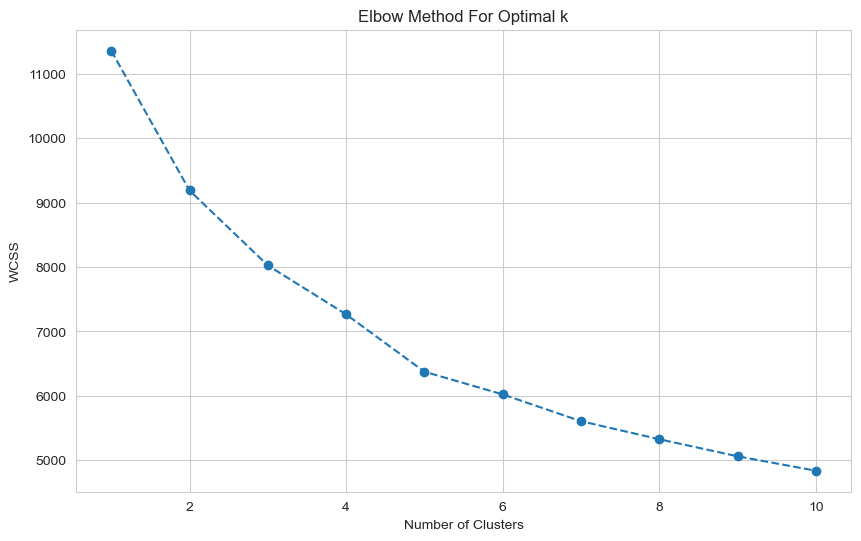

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### K-means Clustering

In [31]:
# Apply K-means clustering with k=4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(df_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = cluster_labels

# Display the first few rows of the dataframe with cluster labels
df.head()

C:\Users\shamu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Cluster
0,2,31,0,0,2,4,1,70.66,27.2,4,0,2
1,2,13,0,0,2,1,1,85.81,18.6,2,0,1
2,1,18,0,0,2,2,2,60.56,33.0,4,0,1
3,2,65,0,0,1,2,2,205.77,46.0,3,1,0
4,1,4,0,0,2,1,1,90.42,16.2,2,0,1


In [32]:
# Create a list of DataFrames, each containing the data for one cluster
cluster_dataframes = [df[df['Cluster'] == i] for i in range(4)]

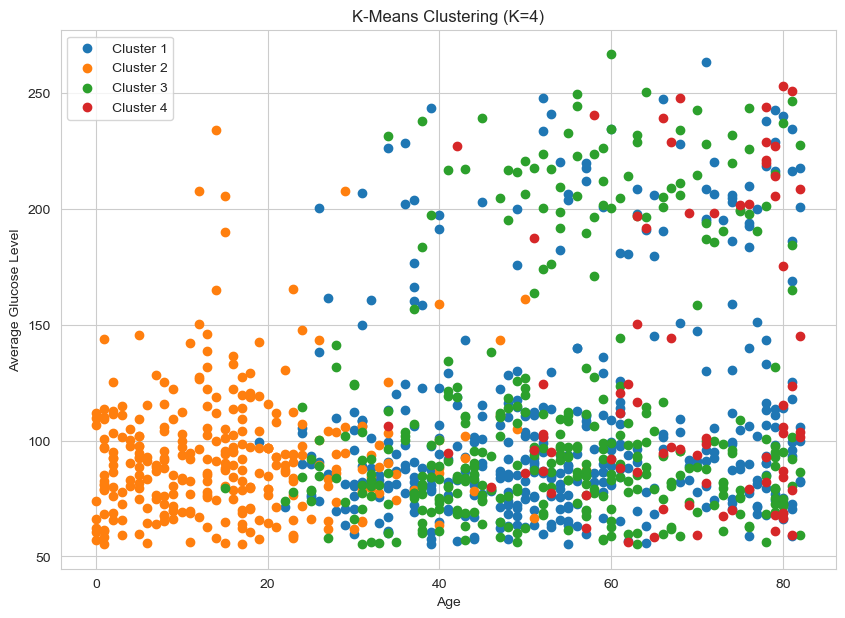

In [33]:
# Plot 1
plt.figure(figsize=(10, 7))
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['age'], cluster_df['avg_glucose_level'], label=f'Cluster {i + 1}')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.title('K-Means Clustering (K=4)')
plt.legend()

# Show the plot
plt.show()

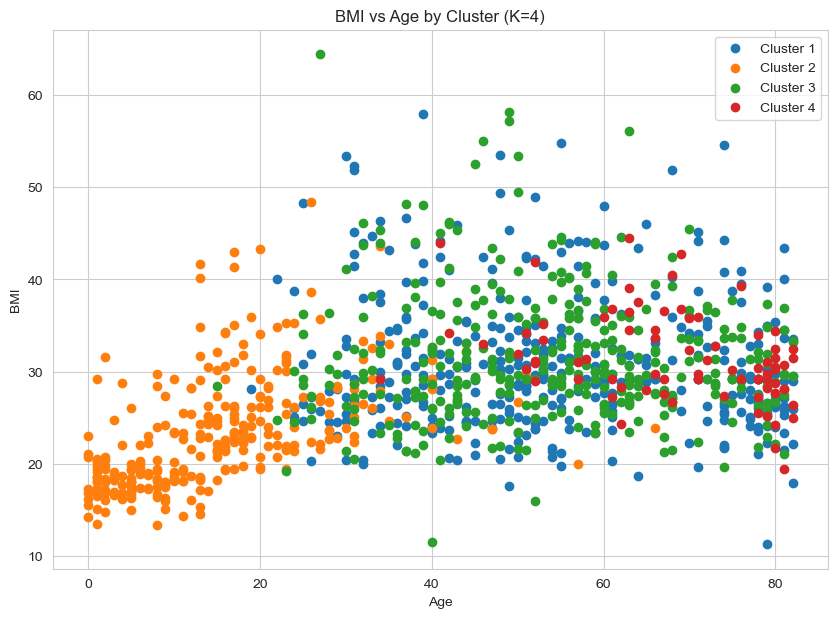

In [34]:
# Plot BMI vs Age
plt.figure(figsize=(10, 7))
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['age'], cluster_df['bmi'], label=f'Cluster {i + 1}')

plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('BMI vs Age by Cluster (K=4)')
plt.legend()
plt.show()

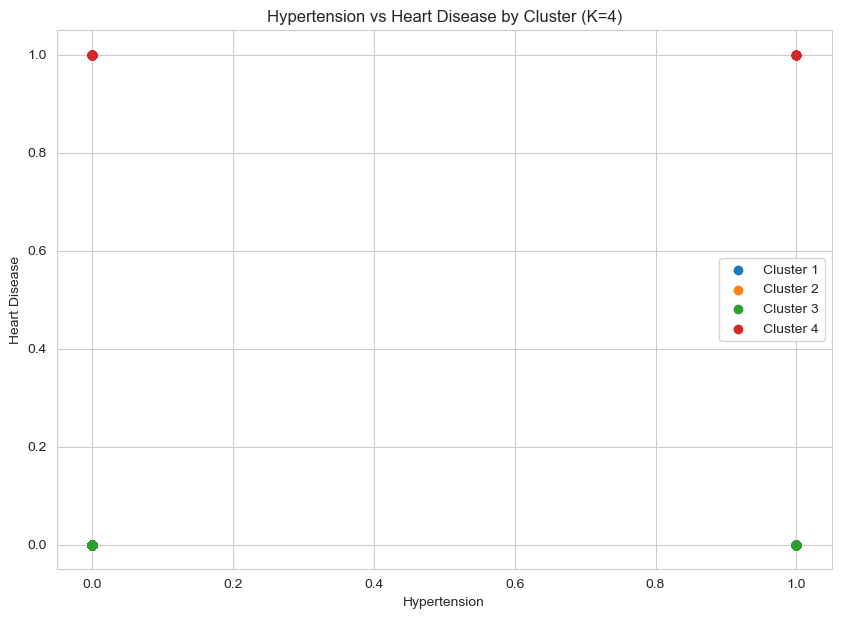

In [35]:
# Plot Hypertension vs Heart Disease
plt.figure(figsize=(10, 7))
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['hypertension'], cluster_df['heart_disease'], label=f'Cluster {i + 1}')

plt.xlabel('Hypertension')
plt.ylabel('Heart Disease')
plt.title('Hypertension vs Heart Disease by Cluster (K=4)')
plt.legend()
plt.show()

### EDA for Each Cluster

Descriptive Statistics: Calculate the mean, median, and standard deviation for each feature within each cluster.

Distribution Plots: Visualize the distribution of key features.

Correlation Analysis: Examine the relationships between features within each cluster.

#### Descriptive Statistics

In [36]:
# Descriptive statistics for each cluster
for i, cluster_df in enumerate(cluster_dataframes):
    print(f"Descriptive statistics for Cluster {i + 1}:")
    print(cluster_df.describe())
    print("------" * 10)

Descriptive statistics for Cluster 1:
           gender         age  hypertension  heart_disease  ever_married  \
count  409.000000  409.000000    409.000000          409.0    409.000000   
mean     1.599022   54.366748      0.134474            0.0      1.100244   
std      0.490697   16.294095      0.341579            0.0      0.300694   
min      1.000000   19.000000      0.000000            0.0      1.000000   
25%      1.000000   41.000000      0.000000            0.0      1.000000   
50%      2.000000   53.000000      0.000000            0.0      1.000000   
75%      2.000000   69.000000      0.000000            0.0      1.000000   
max      2.000000   82.000000      1.000000            0.0      2.000000   

        work_type  Residence_type  avg_glucose_level         bmi  \
count  409.000000           409.0         409.000000  409.000000   
mean     2.564792             2.0         109.468020   30.886961   
std      0.767816             0.0          47.667215    7.116501   
min  

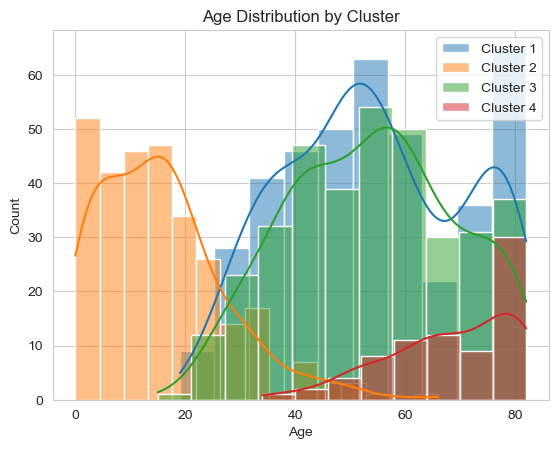

In [37]:
import seaborn as sns

for i, cluster_df in enumerate(cluster_dataframes):
    sns.histplot(cluster_df['age'], kde=True, label=f'Cluster {i + 1}')
plt.title('Age Distribution by Cluster')
plt.xlabel('Age')
plt.legend()
plt.show()

#### Distribution Plots

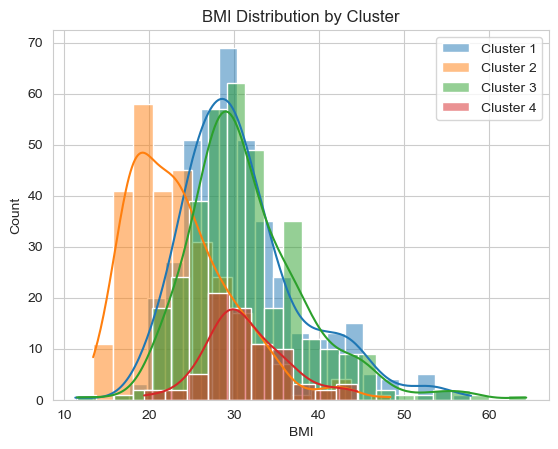

In [38]:
import seaborn as sns

for i, cluster_df in enumerate(cluster_dataframes):
    sns.histplot(cluster_df['bmi'], kde=True, label=f'Cluster {i + 1}')
plt.title('BMI Distribution by Cluster')
plt.xlabel('BMI')
plt.legend()
plt.show()

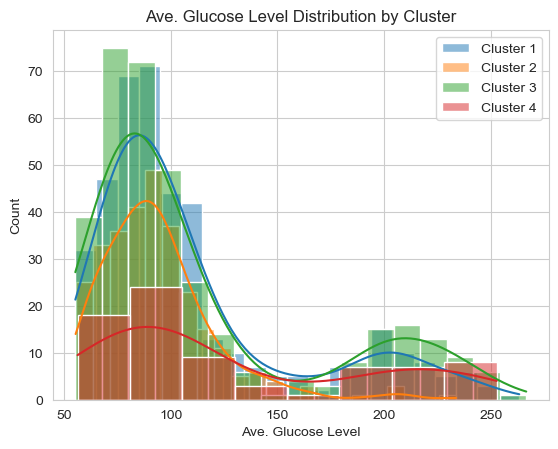

In [39]:
import seaborn as sns

for i, cluster_df in enumerate(cluster_dataframes):
    sns.histplot(cluster_df['avg_glucose_level'], kde=True, label=f'Cluster {i + 1}')
plt.title('Ave. Glucose Level Distribution by Cluster')
plt.xlabel('Ave. Glucose Level')
plt.legend()
plt.show()

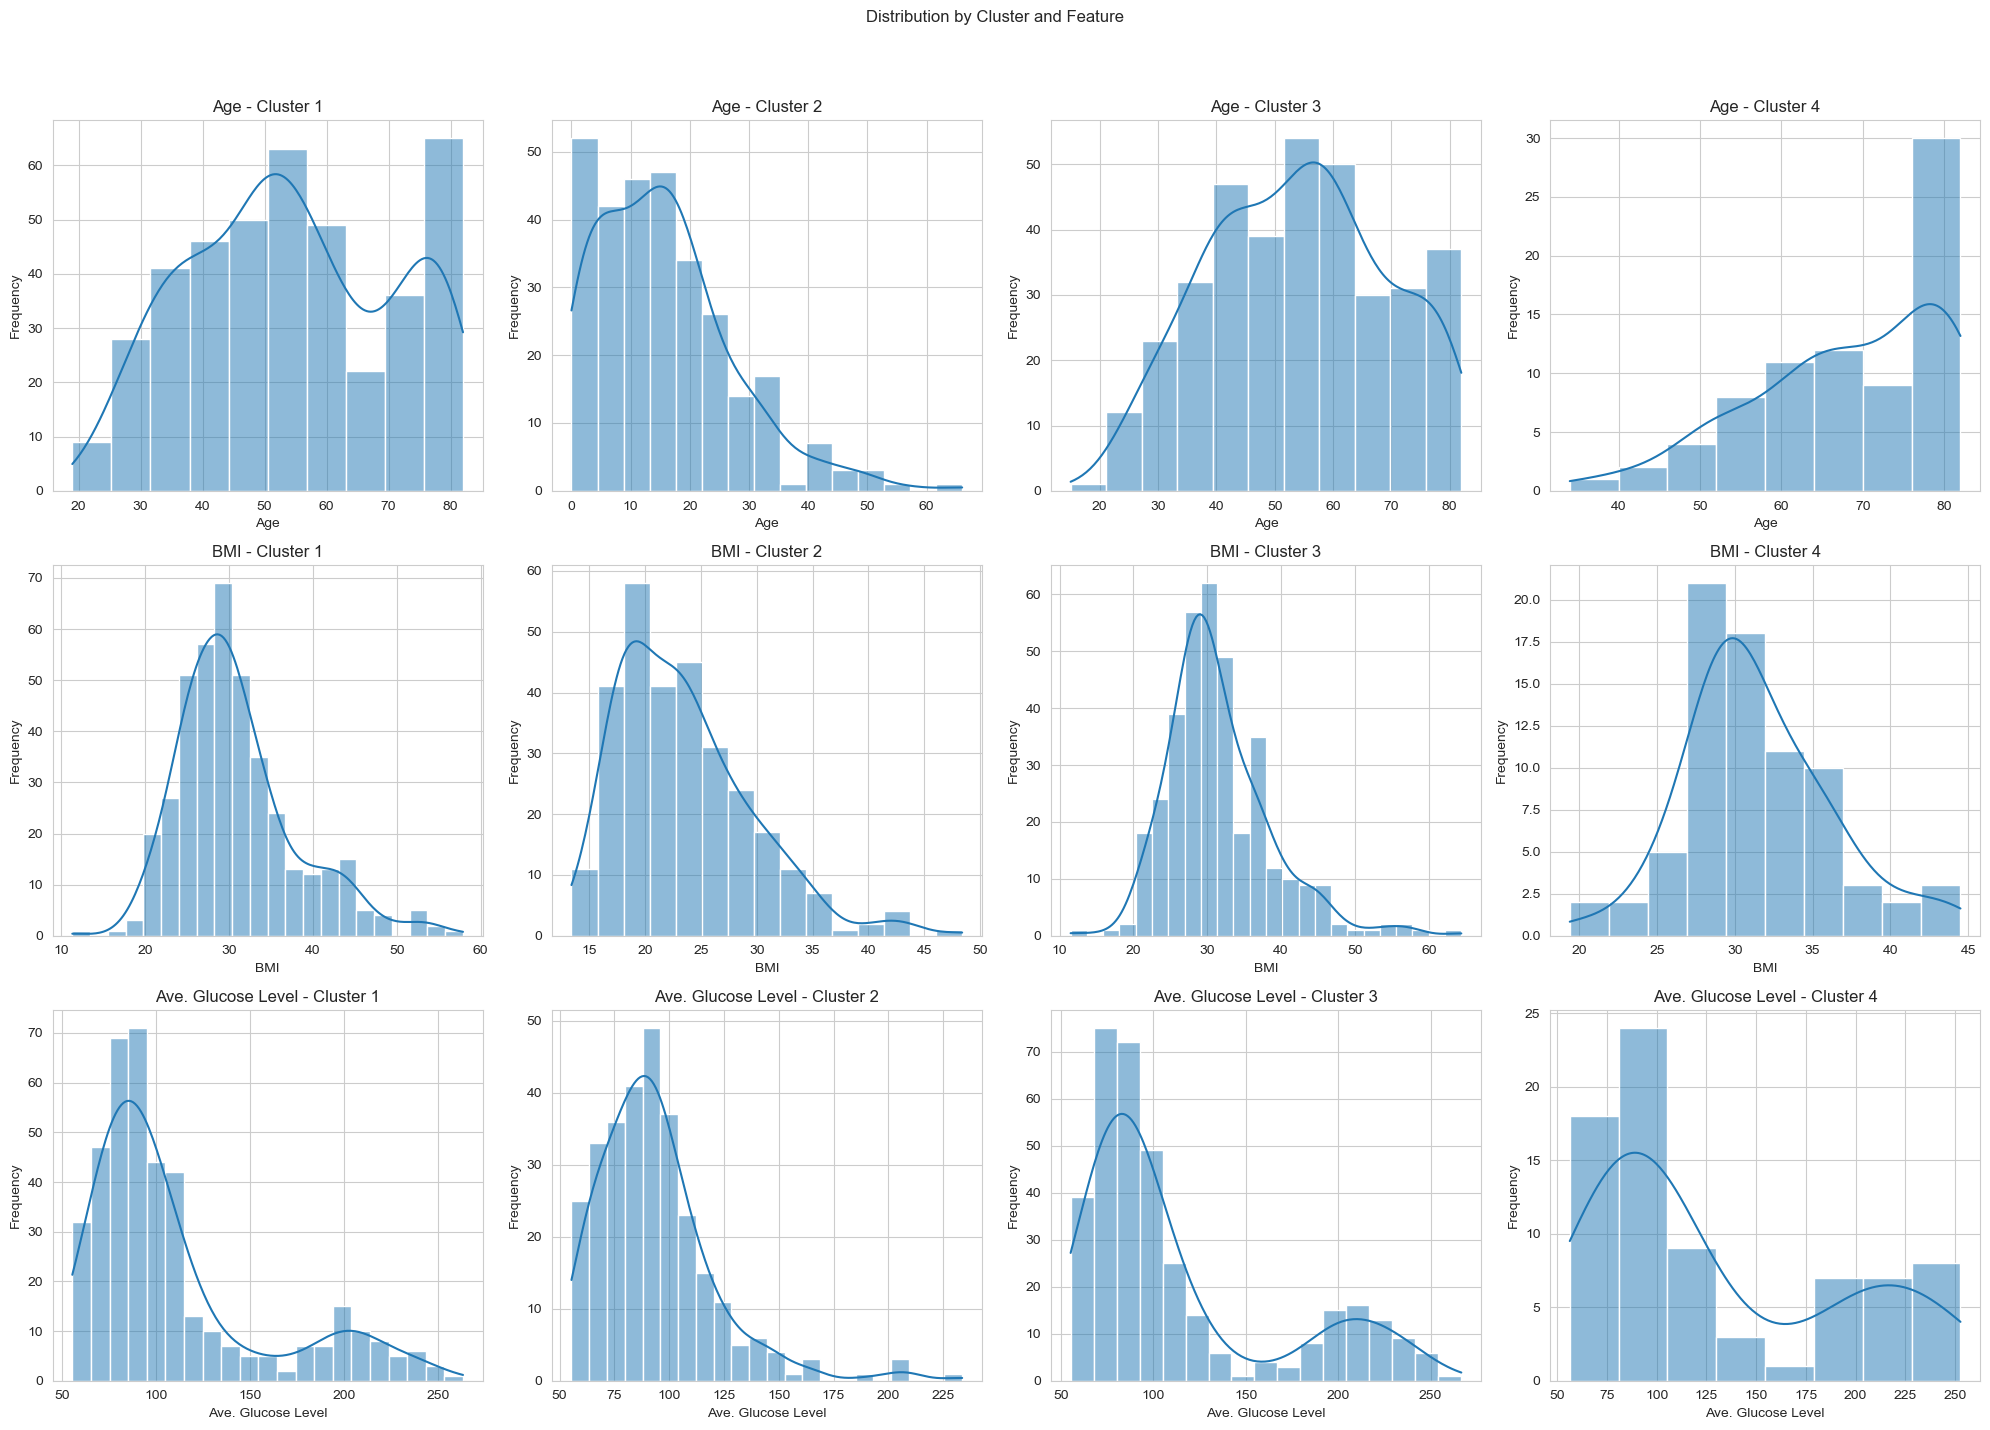

In [40]:
# Suplots Figure
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

features = ['Age', 'BMI', 'Ave. Glucose Level']
feature_data = ['age', 'bmi', 'avg_glucose_level']

fig.suptitle('Distribution by Cluster and Feature')

for i in range(3):
    for j in range(4):
        sns.histplot(cluster_dataframes[j][feature_data[i]], kde=True, ax=axes[i, j])
        axes[i, j].set_title(f'{features[i]} - Cluster {j + 1}')
        axes[i, j].set_xlabel(features[i])
        axes[i, j].set_ylabel('Frequency')

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Correlation Analysis

In [41]:
# Correlation matrices for each cluster
for i, cluster_df in enumerate(cluster_dataframes):
    print(f"Correlation matrix for Cluster {i + 1}:")
    print(cluster_df.corr())
    print("------" * 10)

Correlation matrix for Cluster 1:
                     gender       age  hypertension  heart_disease  \
gender             1.000000  0.019664      0.059278            NaN   
age                0.019664  1.000000      0.187963            NaN   
hypertension       0.059278  0.187963      1.000000            NaN   
heart_disease           NaN       NaN           NaN            NaN   
ever_married       0.057144 -0.029533      0.035474            NaN   
work_type          0.101652  0.097225      0.018096            NaN   
Residence_type          NaN       NaN           NaN            NaN   
avg_glucose_level -0.052982  0.212872      0.178349            NaN   
bmi                0.026234 -0.079227      0.168192            NaN   
smoking_status     0.099209  0.100367      0.053525            NaN   
stroke            -0.032096  0.346752      0.126122            NaN   
Cluster                 NaN       NaN           NaN            NaN   

                   ever_married  work_type  Residence_t

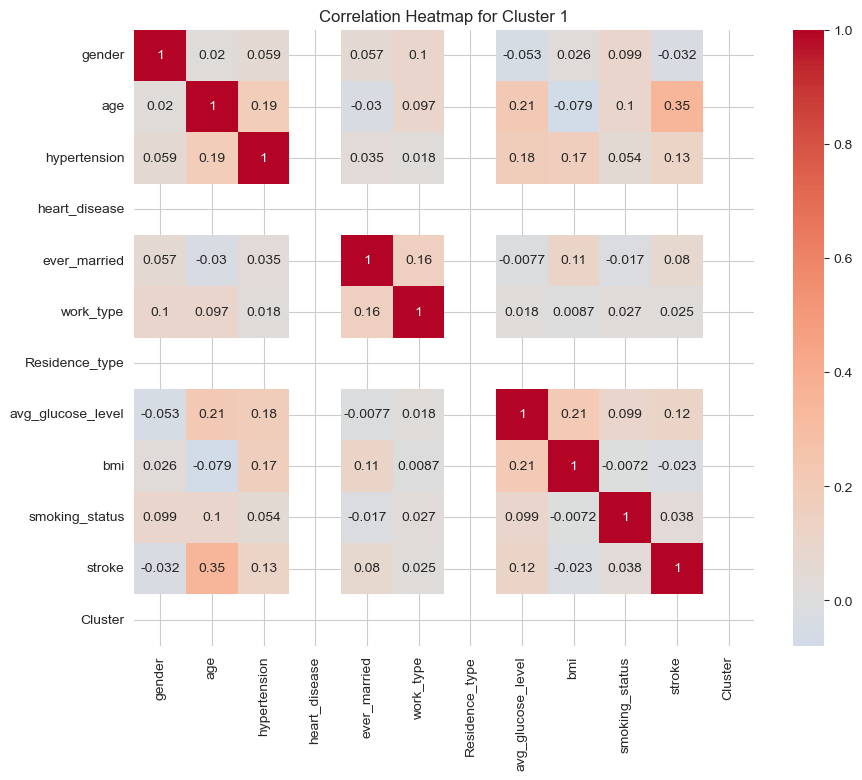

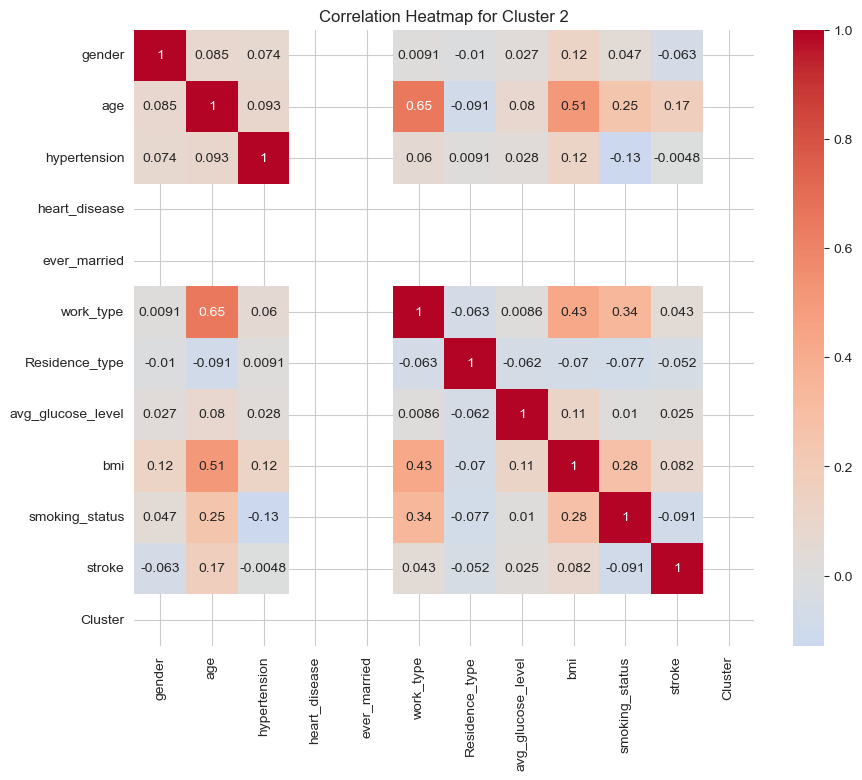

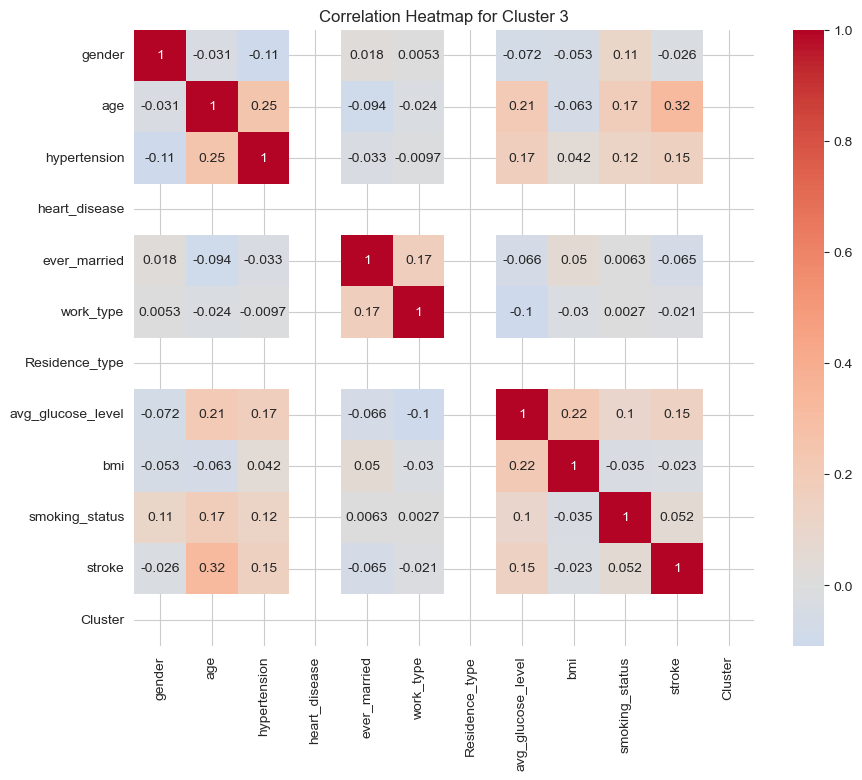

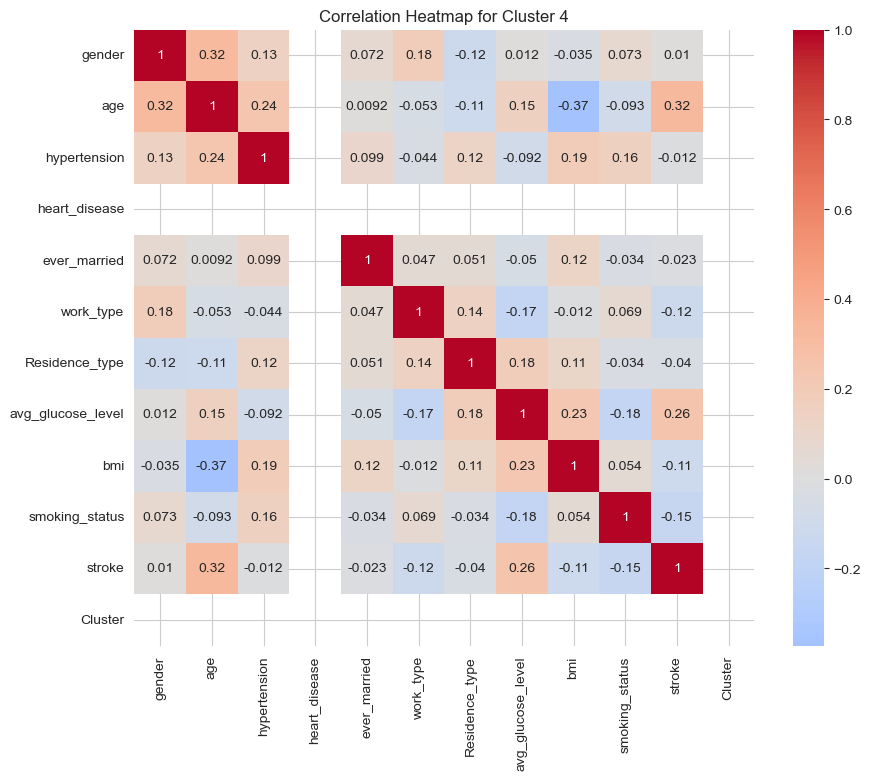

In [42]:
# Heatmaps for each cluster's correlation matrix
for i, cluster_df in enumerate(cluster_dataframes):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cluster_df.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title(f'Correlation Heatmap for Cluster {i + 1}')
    plt.show()

#### Pair plot

C:\Users\shamu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


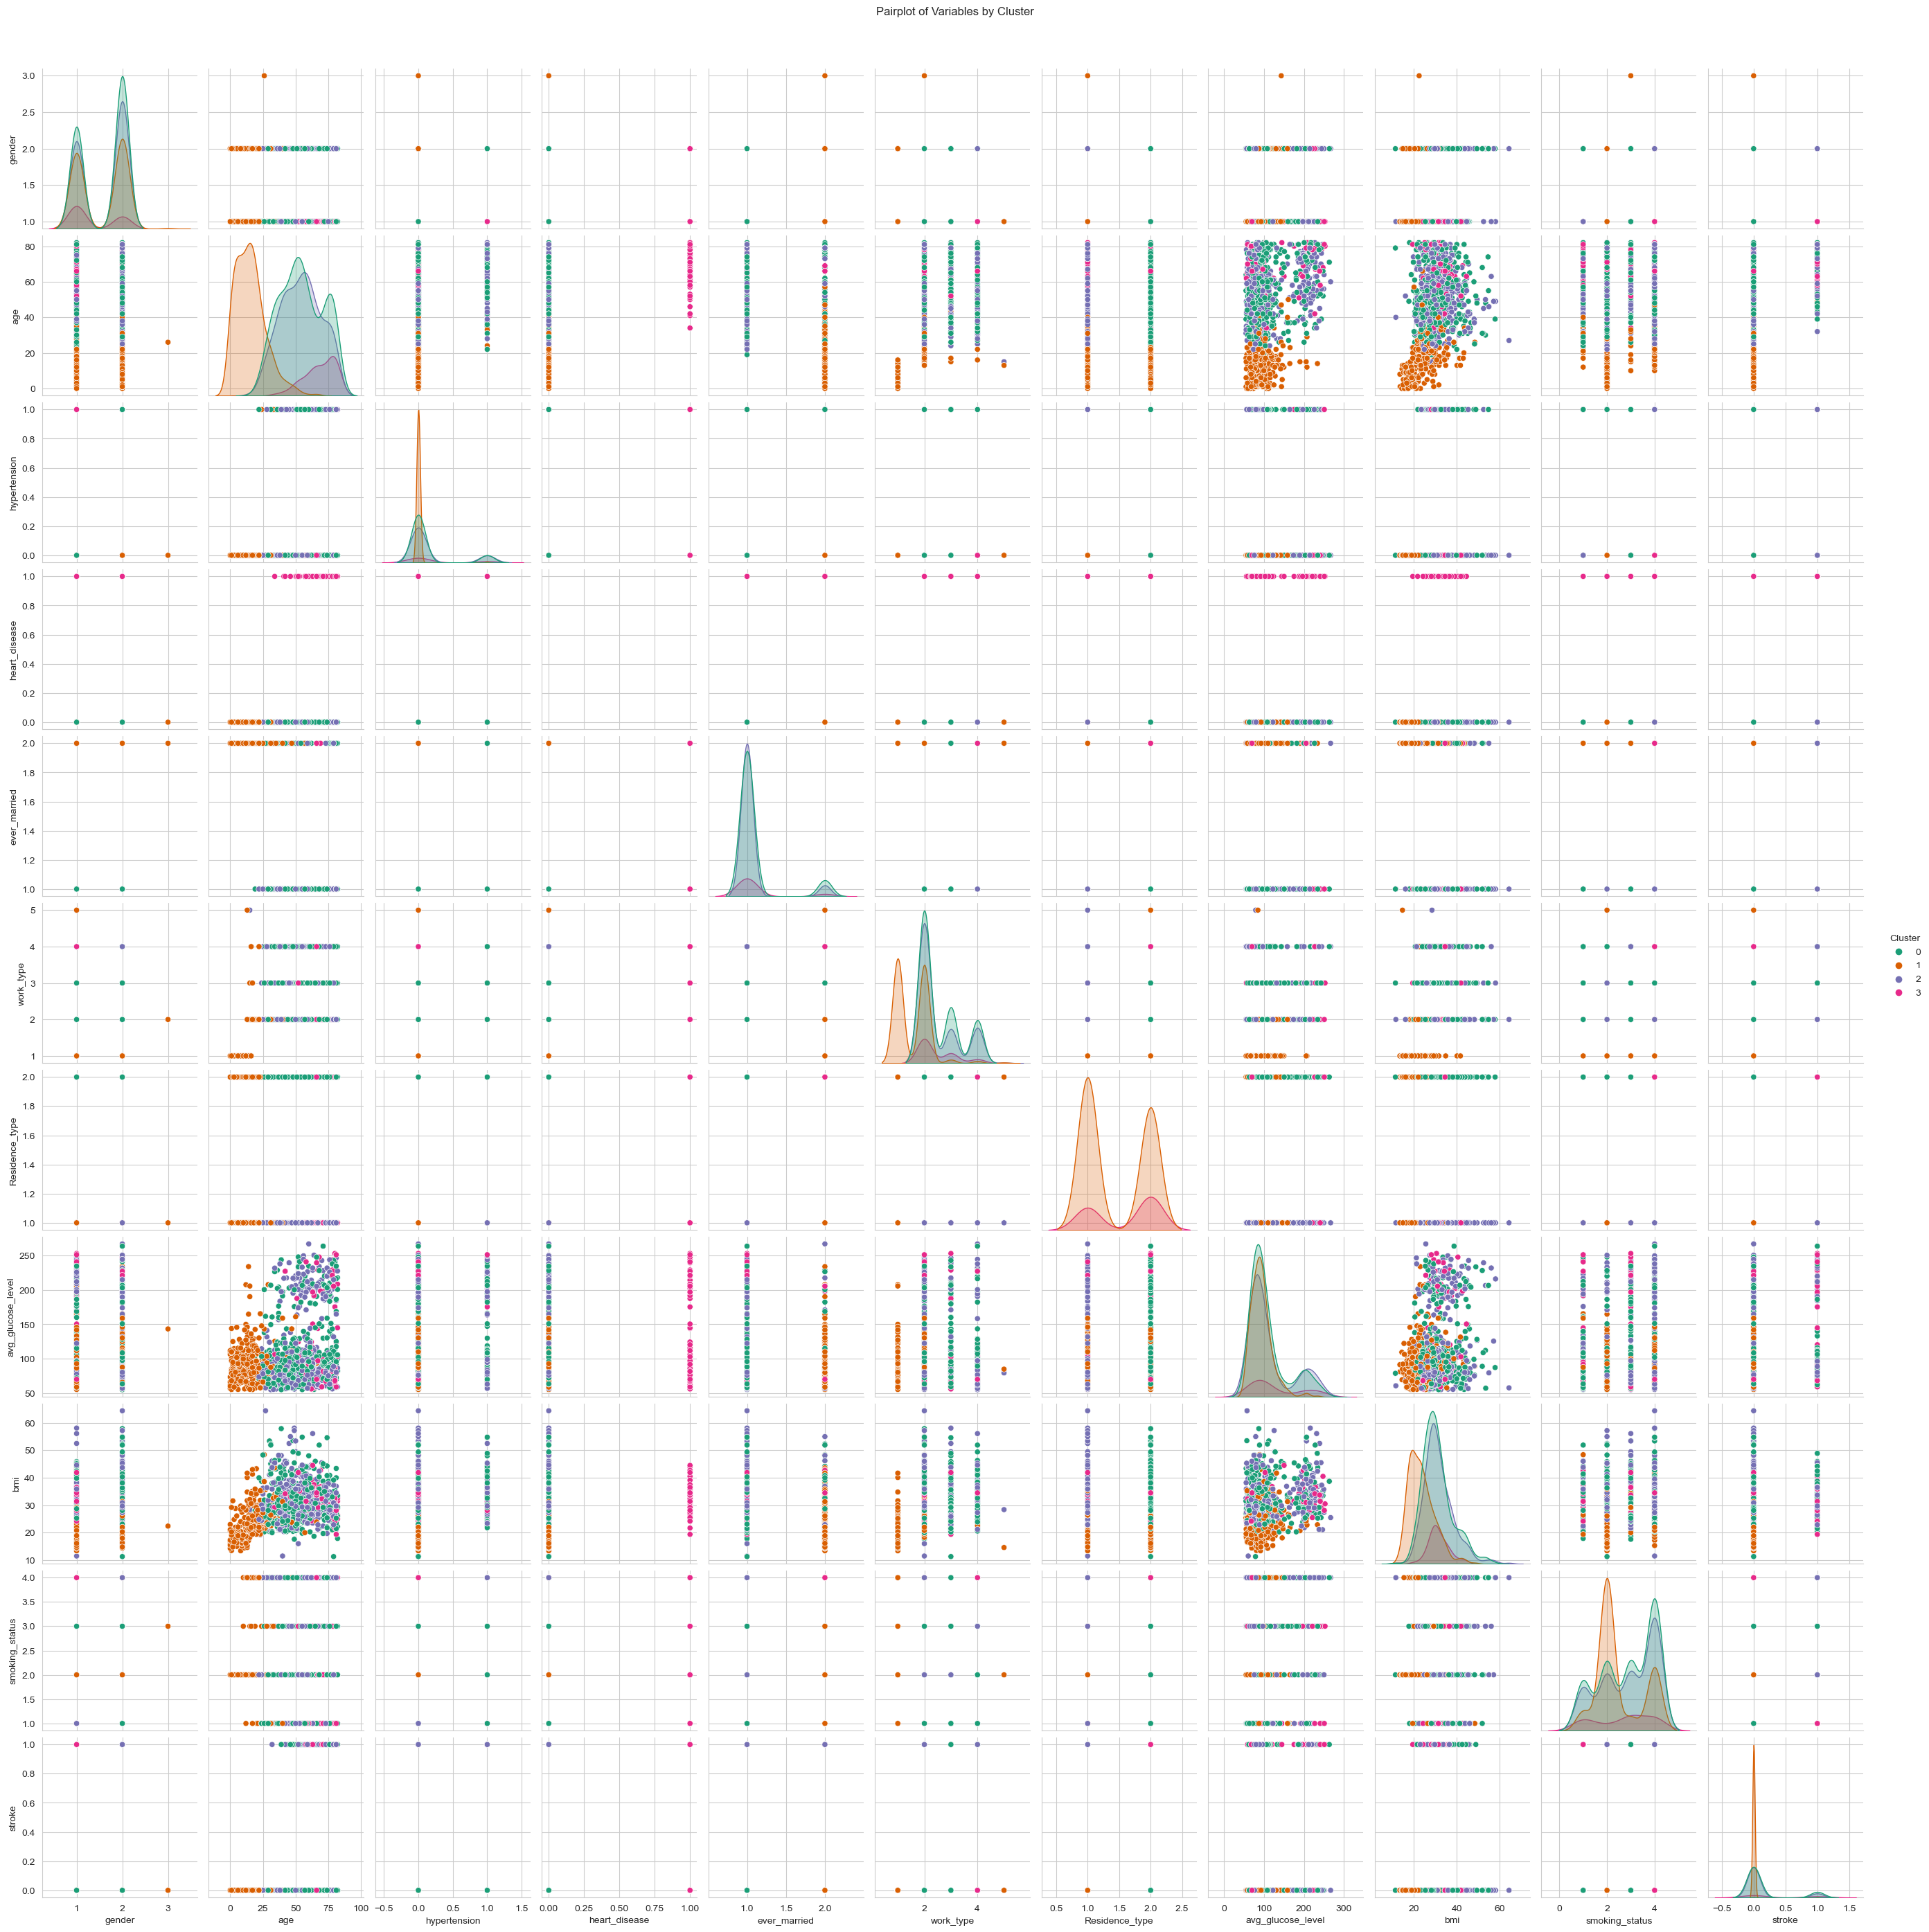

In [43]:
sns.pairplot(df, hue='Cluster', palette='Dark2')

plt.suptitle('Pairplot of Variables by Cluster', y=1.02)
plt.show()